# TRENDS DIFFERENT SIZE SET1


### ENERGY ERROR

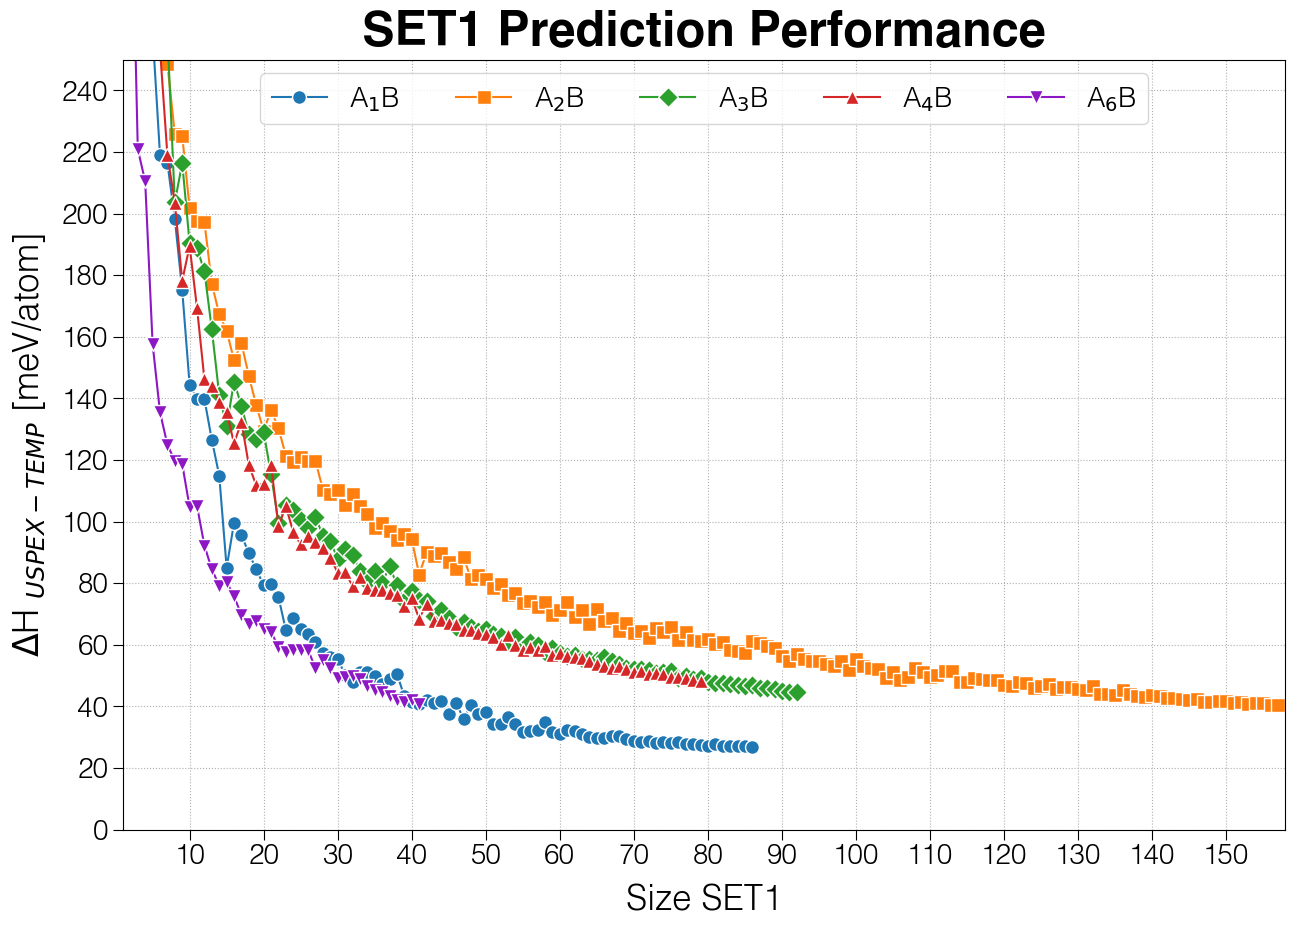

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pyfonts import load_font
from matplotlib.font_manager import FontProperties

# load font
helvetica_bold = load_font("/home/seraf/Downloads/helvetica-255/Helvetica-Bold.ttf")
helv_bold_prop = FontProperties(fname="/home/seraf/Downloads/helvetica-255/Helvetica-Bold.ttf", size=35)

helvetica_strange = load_font("/home/seraf/Downloads/helvetica-255/helvetica-light-587ebe5a59211.ttf")
helv_strange_prop = FontProperties(fname="/home/seraf/Downloads/helvetica-255/helvetica-light-587ebe5a59211.ttf", size=20)


mother_dir = './HvsINIT/'

title = 'SET1 Prediction Performance'
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.0)
ax.set_title(title, fontproperties=helv_bold_prop, pad=10)
max_x_ticks = np.array([])

complist = [1,2,3,4,6]
markerlist = ['o', 's', 'D', '^', 'v']
colorlist = ['#1f77b4', '#ff7f0e', "#2CA02C", '#d62728', "#8d17c4"]
for i, comp in enumerate(complist):
    dir_name = f'{comp}'
    df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStaticsBefore.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T * 1000

    x = np.arange(1, len(tot[0])+1)

    ax.plot(x, tot[0] , marker = markerlist[i], markeredgecolor='white', markersize=10, label=f'A$_{comp}$B', color=colorlist[i])
    max_x_ticks = np.append(max_x_ticks, len(tot[0]))

ax.set_ylabel(r'$\Delta$H $_{USPEX-TEMP}$ [meV/atom]', fontsize=25, font=helvetica_strange, labelpad=10)
ax.set_ylim(0,250)
ax.yaxis.set_major_locator(plt.MultipleLocator(20))


ax.set_xlabel('Size SET1', fontsize=25, font=helvetica_strange, labelpad=10)
xticks = np.arange(0, max(max_x_ticks)+1, 10)
ax.set_xticks(xticks)
ax.set_xlim(1,max(max_x_ticks)+1)
ax.set_xticklabels([f'{i:.0f}' for i in xticks])

ax.tick_params(size=7, labelsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(helv_strange_prop)

ax.grid(True, ls=':')
ax.legend(loc='upper center', prop=helv_strange_prop, ncol=5)

plt.show()
fig.savefig('FIG/Articolo/SET1_DH.png')


# TEMPLATE ANALYSIS

### BEST TEMPLATES

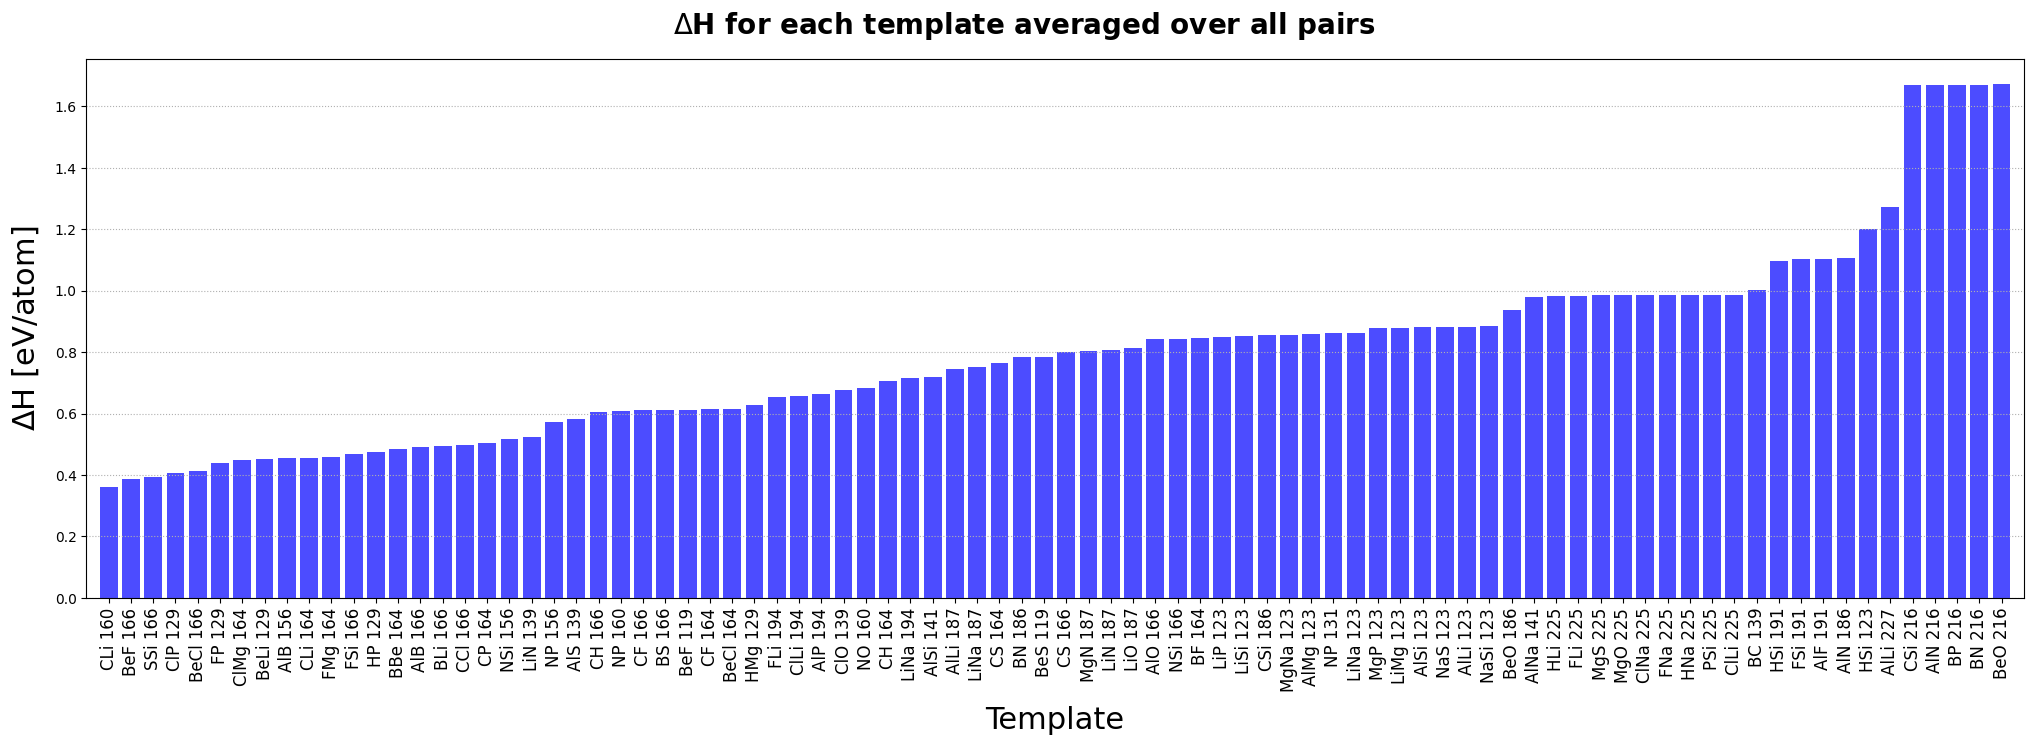

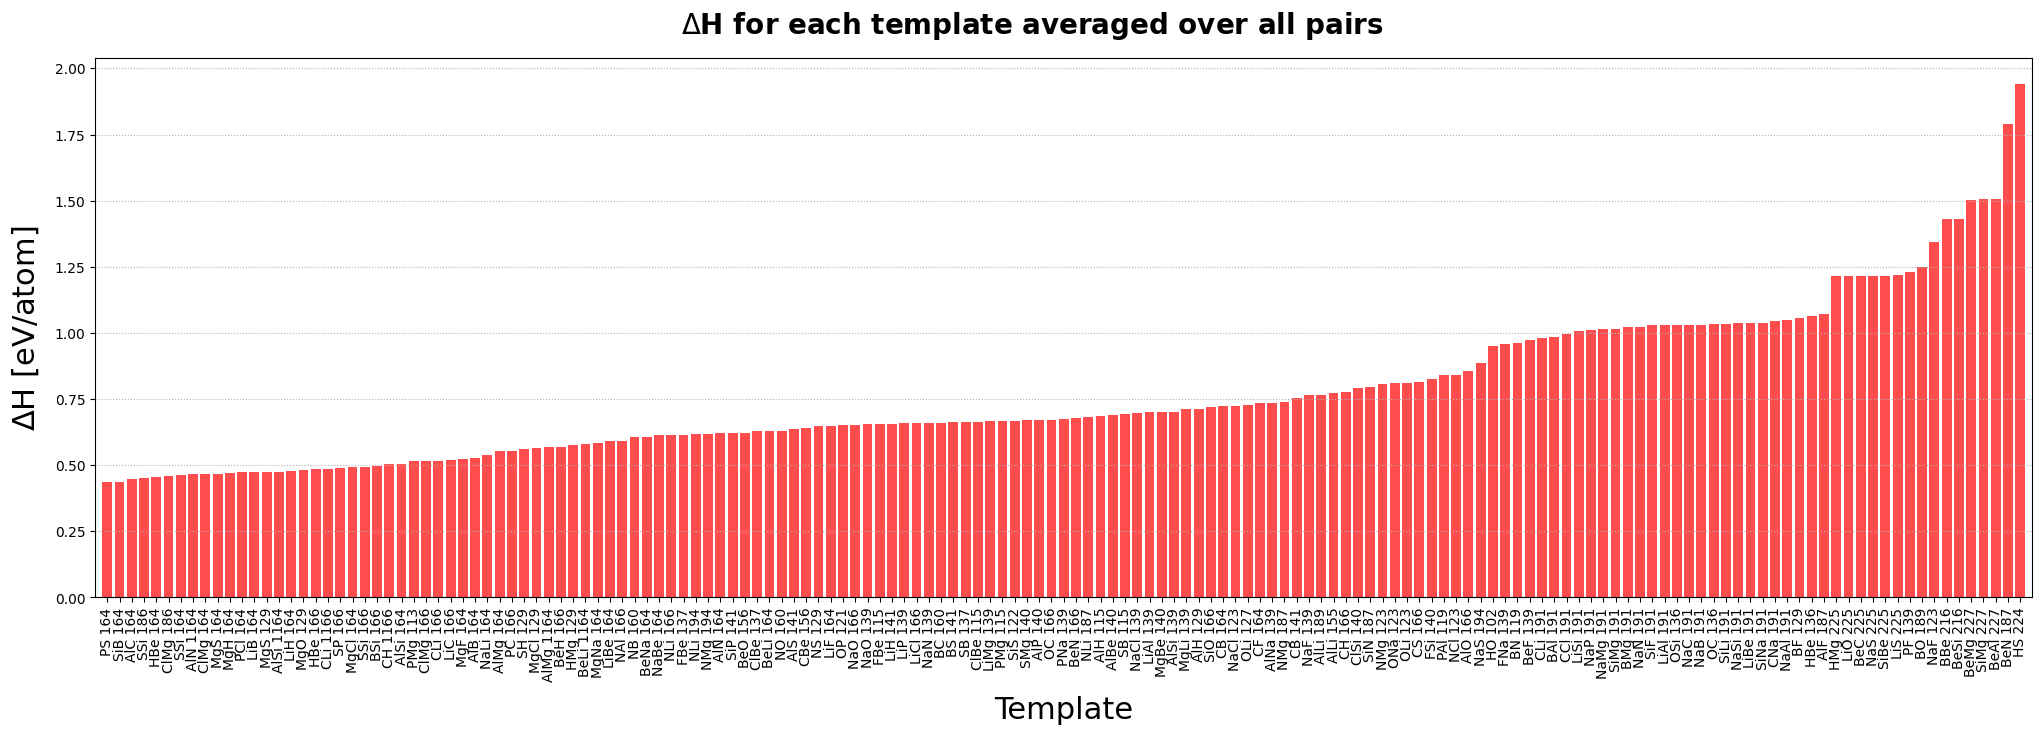

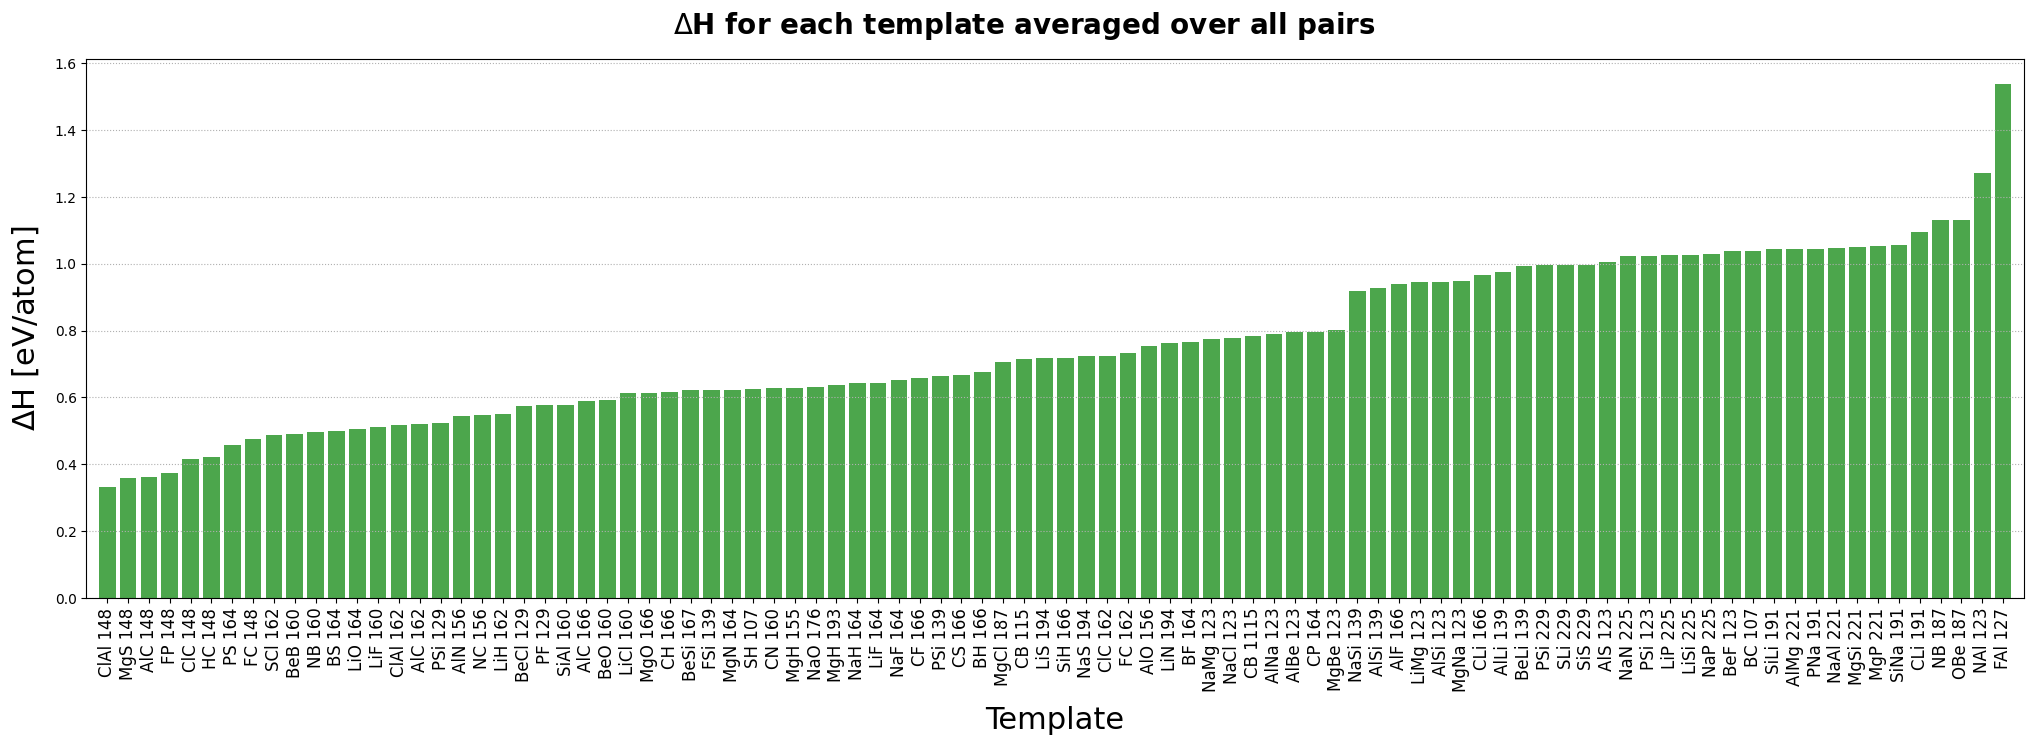

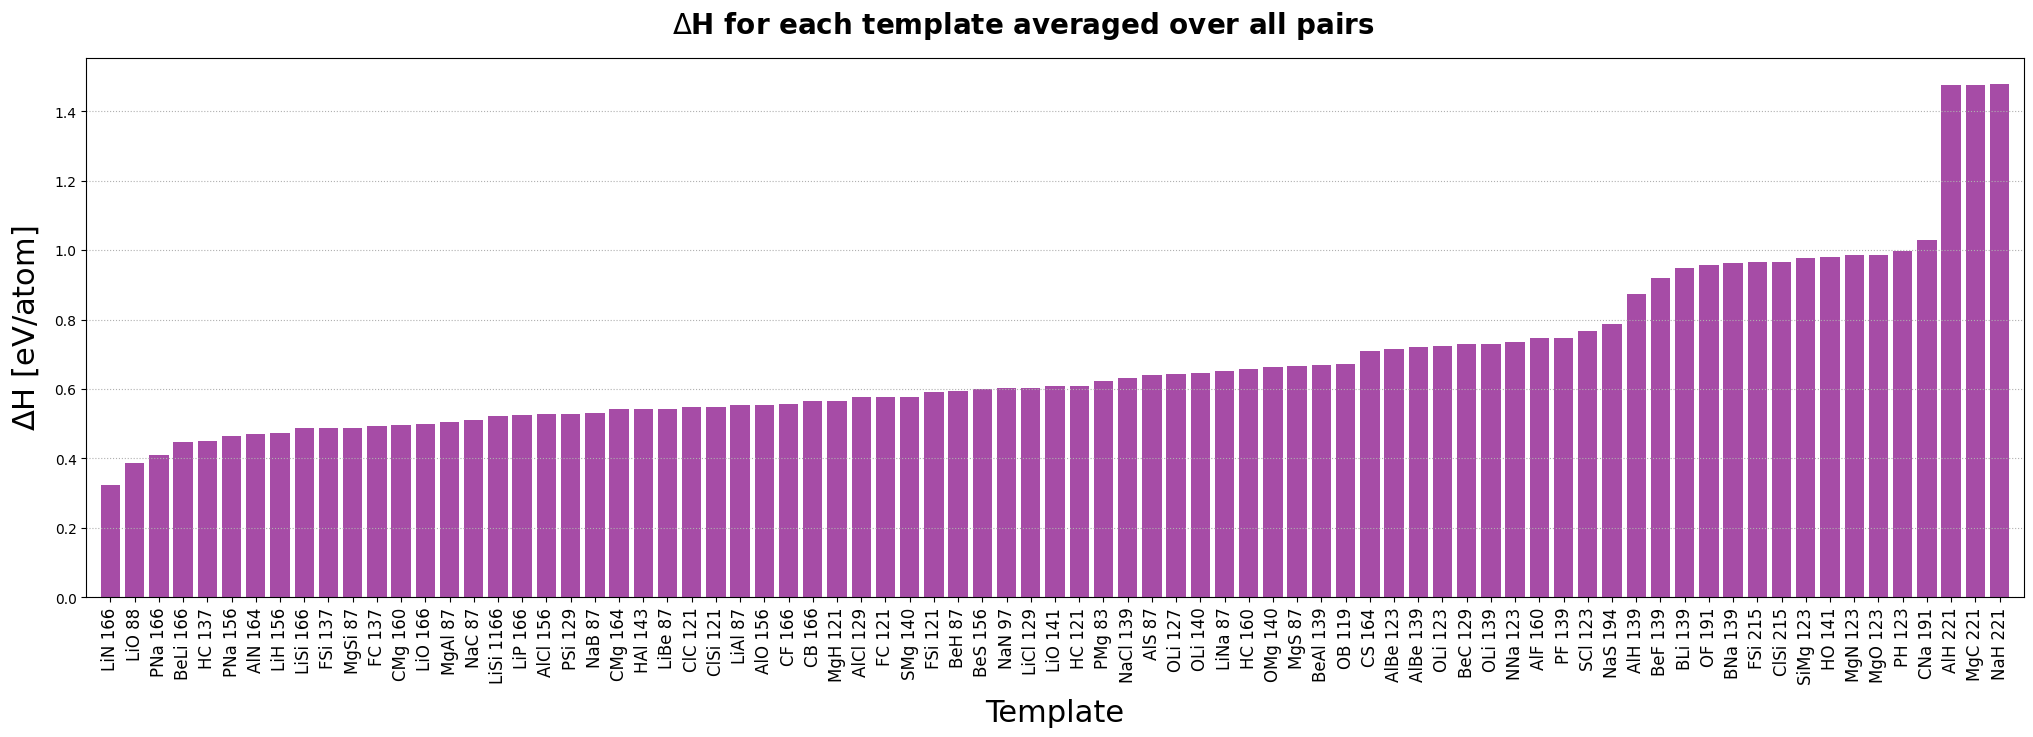

In [1]:
import json
import matplotlib.pyplot as plt

color_list = ['blue', 'red', 'green', 'purple']
comp_list = [1,2,3,4]

for idx, comp in enumerate(comp_list):
    if comp == 1:
        num_pairs = 105
    else:
        num_pairs = 210
    with open(f'ENTHALPY/A{comp}B.json', 'r') as f:
        data = json.load(f)

    with open(f'ENTHALPY/EntGS.json', 'r') as f:
        gs_dict = json.load(f)

    title = r'$\Delta$H for each template averaged over all pairs'
    fig, ax = plt.subplots(1, 1, figsize=(25, 7))

    temp_dict = {}

    count = 0
    for pair in data.keys():
        count +=1
        for temp in data[pair].keys():
            if temp not in temp_dict.keys():
                temp_dict[temp] = (data[pair][temp] - gs_dict[f'{comp}'][pair])/num_pairs
            else:
                temp_dict[temp] += (data[pair][temp] - gs_dict[f'{comp}'][pair])/num_pairs
    
    # Ordina i template in base ai valori delle entalpie
    sorted_items = sorted(temp_dict.items(), key=lambda x: x[1])  
    sorted_keys, sorted_values = zip(*sorted_items)  # Divide in due liste ordinate


    fig.suptitle(title, fontsize=20, y=0.95, fontweight='bold')
    ax.bar(sorted_keys, sorted_values, color=color_list[idx], alpha=0.7)
    ax.set_ylabel(r'$\Delta$H [eV/atom]', fontsize=22, labelpad=10)

    ax.set_xlim(-1, len(temp_dict.keys()))
    ax.set_xlabel('Template', fontsize=22, labelpad=10)
    ax.set_xticks(range(len(sorted_keys)))
    fontsize = 12
    if comp == 2:
        fontsize = 10
    ax.set_xticklabels([f'{i.split("_")[0]} {i.split("_")[1]}' for i in sorted_keys], fontsize=fontsize, rotation=90)


    ax.grid(True, ls=':', axis='y')





### ADAPTABILITY OVER TEMPLATES

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list

# Carica i dati
with open('ENTHALPY/EntGS.json', 'r') as f:
    gs_dict = json.load(f)

elements = ['H', 'Li', 'O', 'Na', 'N', 'Mg', 'Si', 'S', 'Be', 'B', 'Al', 'C', 'F', 'P', 'Cl']

color_list = ['blue', 'red', 'green', 'purple']

for idx, comp in enumerate(gs_dict.keys()):
    if comp in ['6']:
        continue

    pair_count_dict = {}
    with open(f'ENTHALPY/A{comp}B.json', 'r') as f:
        data_ent = json.load(f)
    
    for pair in data_ent.keys():
        pair_count_dict[pair] = 0
        for temp in data_ent[pair].keys():
            if data_ent[pair][temp] - gs_dict[comp][pair] < 0.1:
                pair_count_dict[pair] += 1

    sorted_items = sorted(pair_count_dict.items(), key=lambda x: x[1])  
    sorted_keys, sorted_values = zip(*sorted_items)  # Divide in due liste ordinate

    fig, ax = plt.subplots(1, 1, figsize=(10, 30))
    title = r'Number of templates with $\Delta$H < 0.1 eV/atom' + f' A$_{comp}$B'
    fig.suptitle(title, fontsize=20, y=0.9, fontweight='bold')
    
    ax.barh(sorted_keys, sorted_values, color=color_list[idx], alpha=0.7)
    ax.set_xlabel(r'Number of templates', fontsize=22, labelpad=10, family='serif')

    ax.set_ylim(-1, len(pair_count_dict.keys()))
    ax.set_ylabel('Pair', fontsize=22, labelpad=10, family='serif')
    ax.set_yticks(range(len(sorted_keys)))
    fontsize = 12
    if comp != '1':
        fontsize = 8
    ax.set_yticklabels([f'{i}' for i in sorted_keys], fontsize=fontsize)


    ax.grid(True, ls=':', axis='y')

    

    plt.show()


# TRENDS WITHOUT CRITICAL PAIRS

### PRODUCTION OF DATA

In [14]:
from template_csp import managetemp as mt
import json
import os
import numpy as np

from tqdm import tqdm

test_elements = ['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']

hyperparameters = { 
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "comp" : 1,
    "lev_red" : 0.9,
    "n_pairs" : 105,

    "n_final_templates" : 1
}


complist = [1, 2, 3, 4, 6] 
initlist = [86, 156, 92, 79, 41] # 86 
mother_dir = './HvsINIT/'
path_to_critical_pairs = 'DATA_DICT/CriticalPairs.json'

for comp in complist:
    dir_comp = mother_dir + f'{comp}/'
    hyperparameters['comp'] = comp
    means = np.zeros(initlist[complist.index(comp)])
    stds = np.zeros(initlist[complist.index(comp)])

    for size_initial in tqdm(range(1, initlist[complist.index(comp)]+1)):
        dir_init = dir_comp + f'{size_initial}/'
        errors_bef = np.zeros(20)

        
        for step in range(0,20):
            file_restart = dir_init + f'InitialSet_{step}'

            initial_set = mt.InitialSet(test_elements=test_elements, hyperparameters=hyperparameters, restart_file=file_restart)
            errors_bef[step] = initial_set.difference_from_uspex(path_to_critical_pairs)

        means[size_initial-1] = np.mean(errors_bef)
        stds[size_initial-1] = np.std(errors_bef)

        if size_initial == 1:
            with open(dir_comp + 'BeforeNoCritical0.csv', 'w') as f:
                f.write(f'{size_initial-1},{means[size_initial-1]},{stds[size_initial-1]}\n')
        else:
            with open(dir_comp + 'BeforeNoCritical0.csv', 'a') as f:
                f.write(f'{size_initial-1},{means[size_initial-1]},{stds[size_initial-1]}\n')
        

  0%|          | 0/86 [00:00<?, ?it/s]

100%|██████████| 41/41 [00:12<00:00,  3.27it/s]


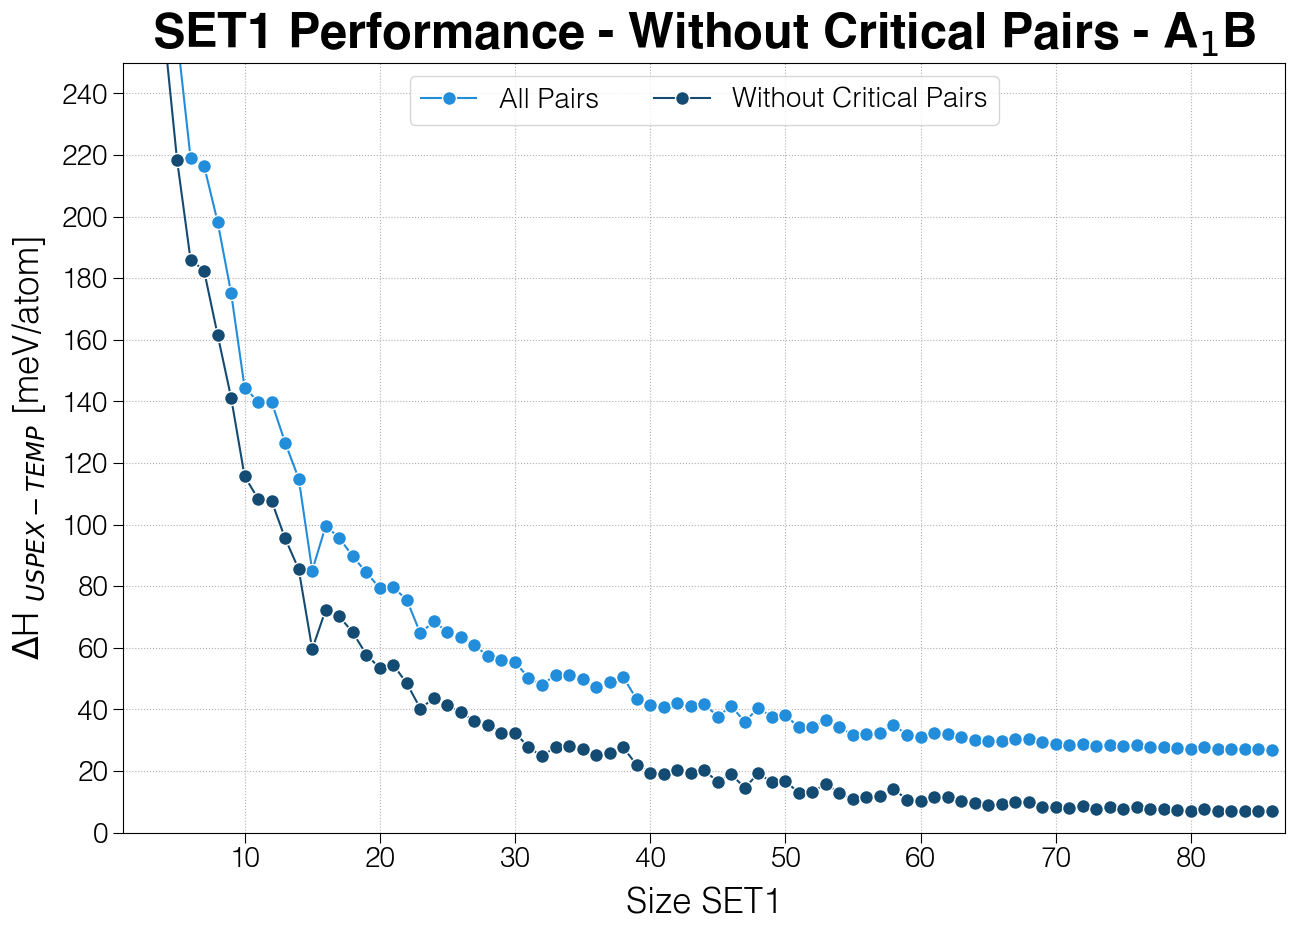

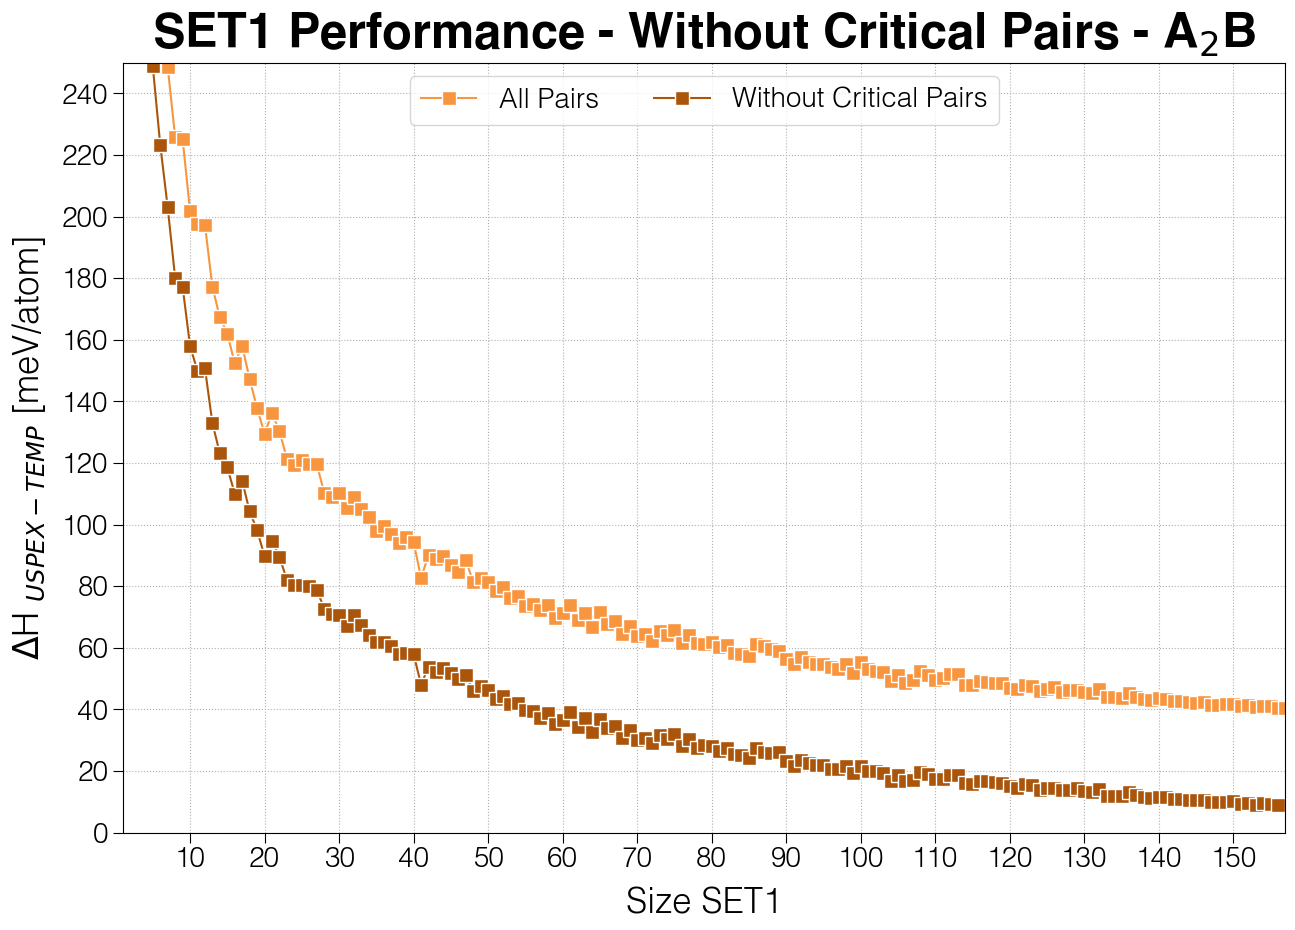

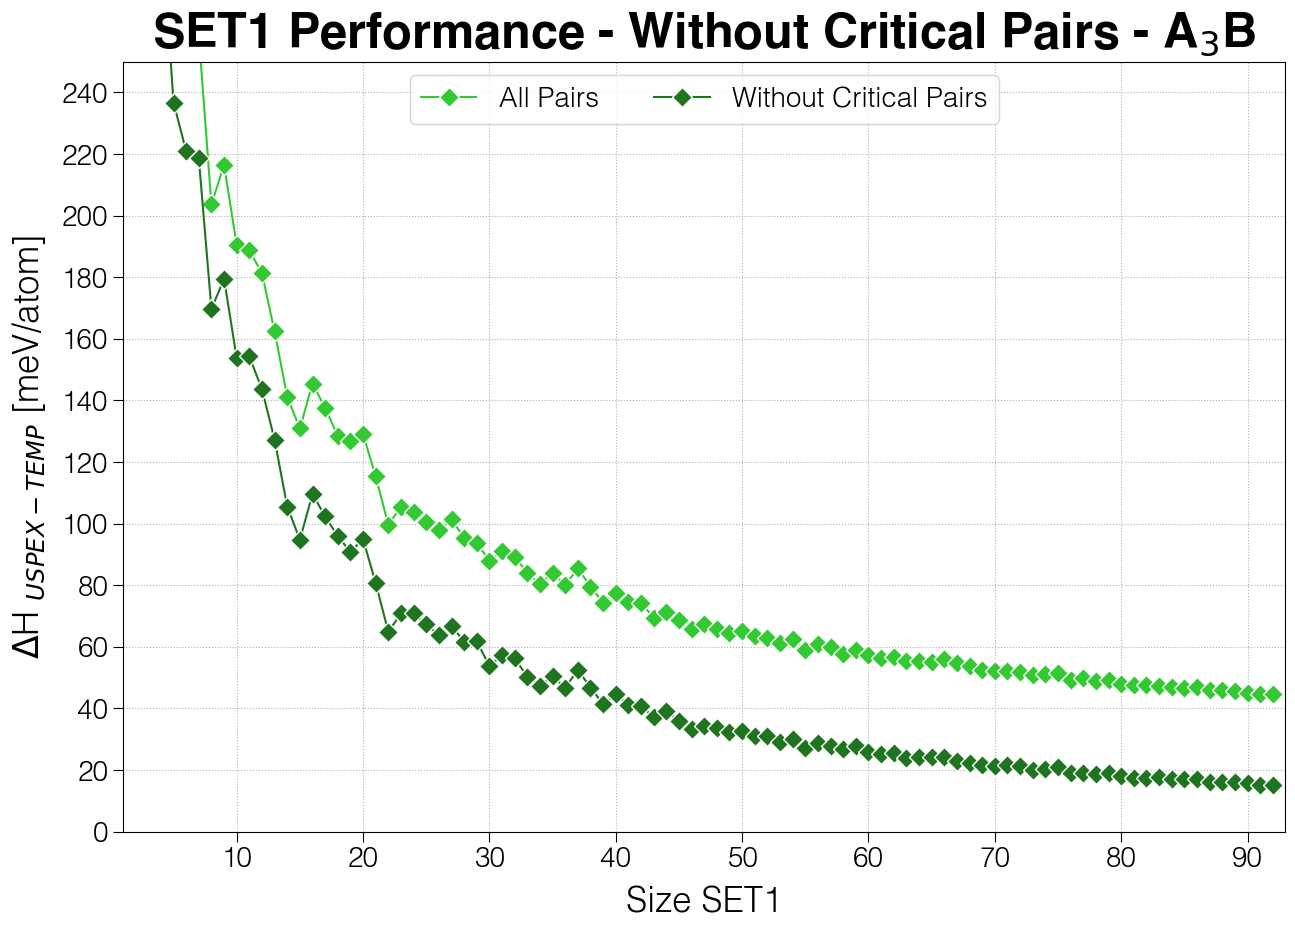

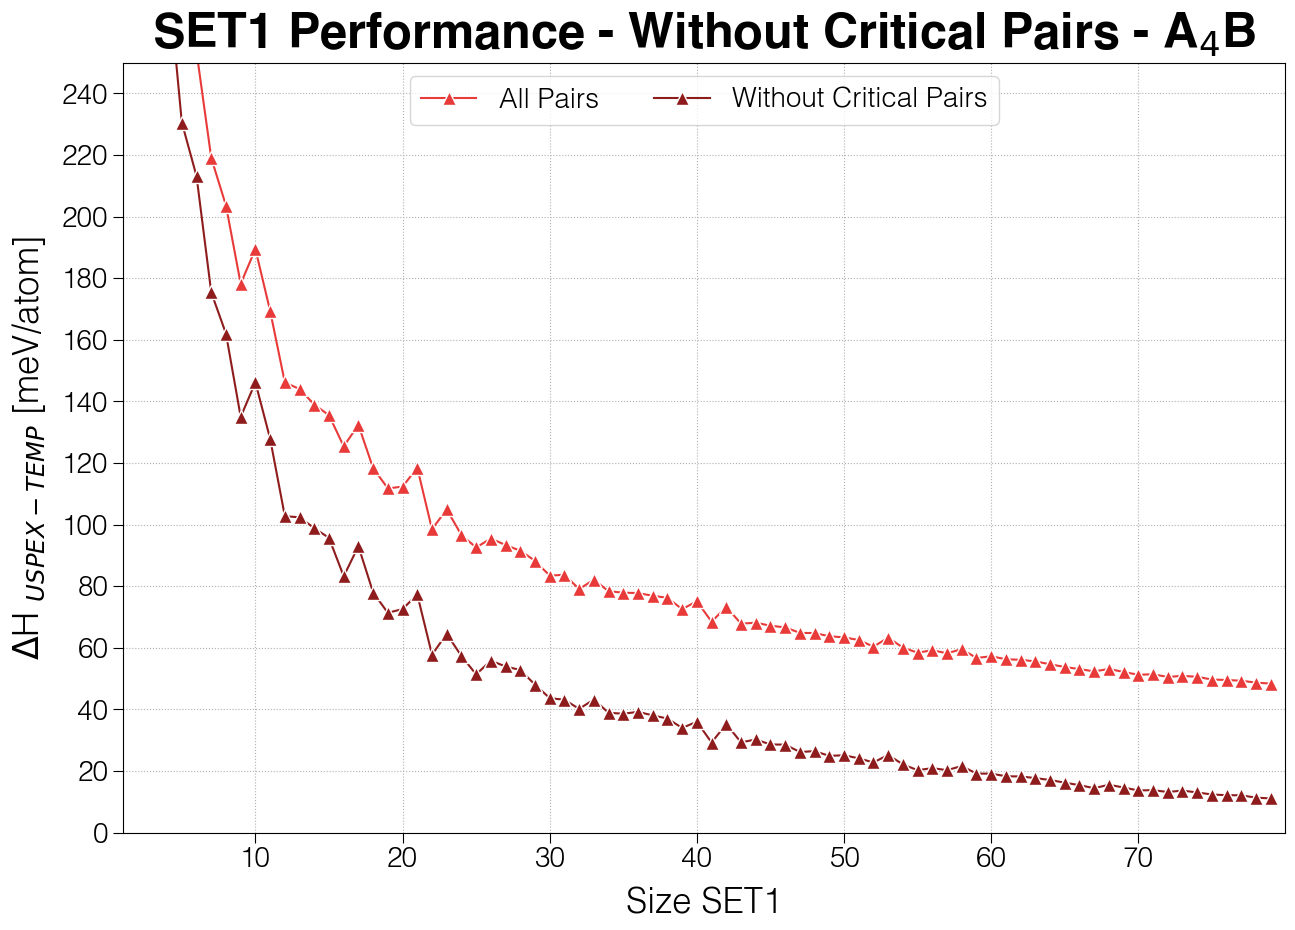

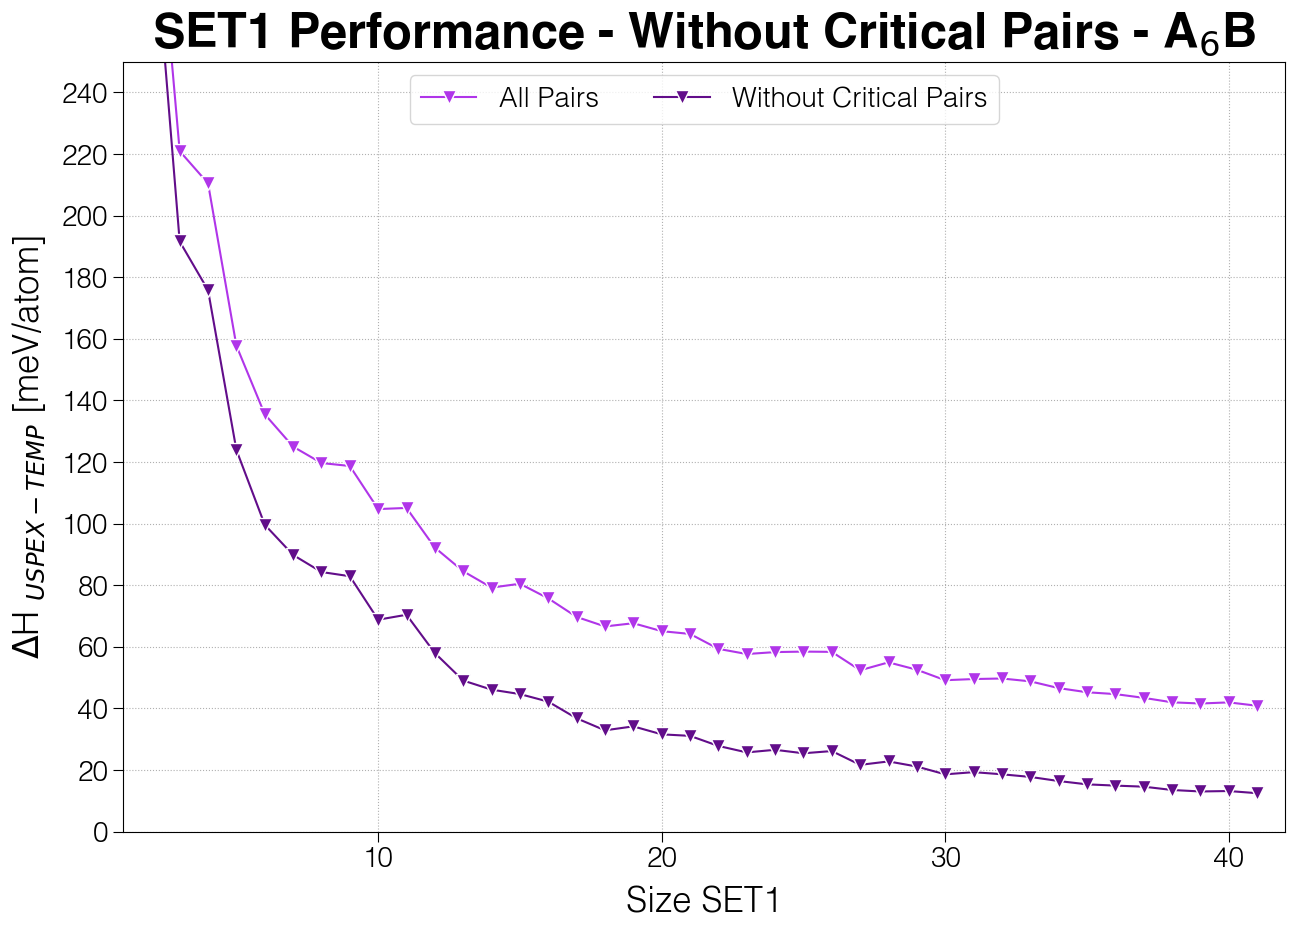

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pyfonts import load_font
from matplotlib.font_manager import FontProperties

# load font
helvetica_bold = load_font("/home/seraf/Downloads/helvetica-255/Helvetica-Bold.ttf")
helv_bold_prop = FontProperties(fname="/home/seraf/Downloads/helvetica-255/Helvetica-Bold.ttf", size=35)

helvetica_strange = load_font("/home/seraf/Downloads/helvetica-255/helvetica-light-587ebe5a59211.ttf")
helv_strange_prop = FontProperties(fname="/home/seraf/Downloads/helvetica-255/helvetica-light-587ebe5a59211.ttf", size=20)


mother_dir = './HvsINIT/'


complist = [1,2,3,4,6]
markerlist = ['o', 's', 'D', '^', 'v']
colorlist = ["#228dda", "#f8953f", "#33C933", "#e93a3a", "#b035e9"]
colorlist2 = ["#144b72", "#aa550a", "#1F751F", "#8f1c1c", "#620d8a"]

for i, comp in enumerate(complist):

    title = 'SET1 Performance - Without Critical Pairs - ' + f'A$_{comp}$B'
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.0)
    ax.set_title(title, fontproperties=helv_bold_prop, pad=10)
    max_x_ticks = np.array([])

    dir_name = f'{comp}'
    df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStaticsBefore.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T * 1000

    x = np.arange(1, len(tot[0])+1)

    ax.plot(x, tot[0] , marker = markerlist[i], markeredgecolor='white', markersize=10, label=f'All Pairs', color=colorlist[i])

    df_tot = pd.read_csv(mother_dir + f'{dir_name}/BeforeNoCritical0.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T * 1000

    x = np.arange(1, len(tot[0])+1)

    ax.plot(x, tot[0] , marker = markerlist[i], markeredgecolor='white', markersize=10, label=f'Without Critical Pairs', color=colorlist2[i])

    max_x_ticks = np.append(max_x_ticks, len(tot[0]))

    ax.set_ylabel(r'$\Delta$H $_{USPEX-TEMP}$ [meV/atom]', fontsize=25, font=helvetica_strange, labelpad=10)
    step = 20
    # y_ticks  = np.arange(0,250,step, dtype=float)
    # ax.set_yticks(y_ticks)
    # ax.set_yticklabels([f'{i:.0f}' for i in y_ticks])
    ax.set_ylim(0,250)
    ax.yaxis.set_major_locator(plt.MultipleLocator(20))


    ax.set_xlabel('Size SET1', fontsize=25, font=helvetica_strange, labelpad=10)
    xticks = np.arange(0, max(max_x_ticks)+1, 10)
    ax.set_xticks(xticks)
    ax.set_xlim(1,max(max_x_ticks)+1)
    ax.set_xticklabels([f'{i:.0f}' for i in xticks])

    ax.tick_params(size=7, labelsize=15)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(helv_strange_prop)

    ax.grid(True, ls=':')
    ax.legend(loc='upper center', prop=helv_strange_prop, ncol=2)

    plt.show()
    fig.savefig('FIG/Articolo/SuppCrit_' + f'A{comp}B.png')


# PROVE

In [ ]:
from template_csp import manage_alltemp as mte 
import json
from tqdm import tqdm

test_elements = ['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']

hyperparameters = { 
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "comp" : 1,
    "lev_red" : 0.9,
    "n_pairs" : 105,

    "n_template" : 1,

    "n_final_templates" : 1,
    "job_id" : 0
    #"critical_pairs" : './CriticalPairs.json'
}

data = {}
data1 = {}

complist = [1,2,3,4,6]
temp_list = [[20,30,40], [40,50,60], [30,40,50], [30,40,50], [20,30,40]] 
temp_final = [10, 20, 15, 15, 10]
#total_pairs_list = [95, 180, 175, 171, 210]
total_pairs_list = None
n_set = 20
n_try_pairs = 30

crit_pairs = './CriticalPairs.json'

for comp, temp_init_list in tqdm(zip(complist, temp_list)):
    
    if comp == 6:
        continue

    hyperparameters["comp"] = comp
    
    if total_pairs_list:
        total_pairs = total_pairs_list[complist.index(comp)]
    else:
        if comp == 1:
            total_pairs = 105
        else:
            total_pairs = 210

    data[comp] = {'ErrBef': {}, 'ErrAft': {}}
    data1[comp] = {}

    hyperparameters['n_final_templates'] = temp_final[complist.index(comp)]

    for idx_temp, temp_init in enumerate(temp_init_list):

        data[comp]['ErrBef'][temp_init] = 0
        data[comp]['ErrAft'][temp_init] = {}
        data1[comp][temp_init] = {}    

        for id_set in range(n_set):

            init_set = mte.InitialSet(test_elements, hyperparameters, 'InitialSet.txt')
            # init_set.recap()
            
            data[comp]['ErrBef'][temp_init] += init_set.difference_from_uspex()/n_set
            
            for idx_npair, npair in enumerate(range(1, total_pairs, 5)):

                if npair not in data[comp]['ErrAft'][temp_init].keys():
                    data[comp]['ErrAft'][temp_init][npair] = 0
                    data1[comp][temp_init][npair] = 0

                hyperparameters["n_pairs"] = npair
                
                for try_pairs in range(n_try_pairs):
                    final_set = mte.FinalSet(init_set, test_elements, hyperparameters, 'FinalSet.txt')
                    
                    data[comp]['ErrAft'][temp_init][npair] += final_set.difference_from_uspex()/(n_set*n_try_pairs)
                    data1[comp][temp_init][npair] += float(final_set.count_crit_in_validation)/(n_set*n_try_pairs)

                    # final_set.recap()
        
            
            npair = total_pairs
            hyperparameters["n_pairs"] = npair

            final_set = mte.generate_final_set(init_set, hyperparameters=hyperparameters, test_elements=test_elements, file_crit_pairs = crit_pairs)
            if npair not in data[comp]['ErrAft'][temp_init].keys():
                data[comp]['ErrAft'][temp_init][npair] = 0
                data1[comp][temp_init][npair] = 0
            
            data1[comp][temp_init][npair] += float(final_set.count_crit_in_validation)/n_set
            data[comp]['ErrAft'][temp_init][npair] += final_set.difference_from_uspex()/n_set

            with open('./NumberOfPairs_Continuum.json', 'w') as f:
                json.dump(data, f, indent=4)
                
            with open('./UsedCritPairs.json', 'w') as f:
                json.dump(data1, f, indent=4) 


In [10]:
import numpy as np
import os 
import random
import time
from tqdm import tqdm
from template_csp.managetemp import generate_final_set, generate_initial_set
import json


def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

comp = 6
ntemp_start = 41
ntemp_end = 42
n_sets = 20
job_id = 1

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']

hyperparameters = {
    'ntemp_start' : ntemp_start,
    'ntemp_end' : ntemp_end,

    'comp' : comp,
    'lev_gen' : 0.0,
    'lev_gen_initial' : 0.0,
    'step' : 0.1,
    'n_sets' : n_sets,
    'n_template' : 1,

    'id_set' : 1,
    'weight_formation_entalphy' : 1,
    'weight_occurrence' : 1,
    'weight_sg' : 0.001,

    'n_pairs' : 210,    
    'job_id' : job_id
}

random.seed(time.time())
# ntem = [86, 157, 92, 79]
n_final = [10,20,15,15,10]
complist = [1,2,3,4,6]

hyperparameters['n_final_templates'] = n_final[complist.index(comp)]

if hyperparameters['comp'] == 1:
    n_possible_couples = 105
    hyperparameters['n_pairs'] = 105
else:
    n_possible_couples = 210

dir_temp = f'./{hyperparameters["comp"]}/'
create_directory(dir_temp)

with open(dir_temp + 'params.json', 'w') as f:
    json.dump(hyperparameters, f, indent=4)

# Range in cui varia il numero di template estratti
ntemp_studied = hyperparameters['ntemp_end'] - hyperparameters['ntemp_start'] + 1 

# Vettori per i risultati globali
means = np.zeros(ntemp_studied)
stds = np.zeros(ntemp_studied)

tempmeans = np.zeros(ntemp_studied)
tempstds = np.zeros(ntemp_studied)

means_bef = np.zeros(ntemp_studied)
stds_bef = np.zeros(ntemp_studied)

means_number_ea = np.zeros(ntemp_studied)
stds_number_ea = np.zeros(ntemp_studied)

with open(f'{comp}/TotalStatics.csv', 'w') as f:
    for i in range(ntemp_end):
        f.write(f'{i},0,0\n')

with open(f'{comp}/NumberTempRedu.csv', 'w') as f:
    for i in range(ntemp_end):
        f.write(f'{i},0,0\n')

with open(f'{comp}/TotalStaticsBefore.csv', 'w') as f:
    for i in range(ntemp_end):
        f.write(f'{i},0,0\n')

with open(f'{comp}/NumberSearches.csv', 'w') as f:
    for i in range(ntemp_end):
        f.write(f'{i},0,0\n')


for i in tqdm(range(hyperparameters['ntemp_start'],hyperparameters['ntemp_end'])):

    hyperparameters['n_template'] = i

    # vettori per store di errore totale e numero di template rimanenti del singolo set
    errors = np.zeros(hyperparameters['n_sets'])
    n_templates = np.zeros(hyperparameters['n_sets'])
    errors_bef = np.zeros(hyperparameters['n_sets'])
    number_ea = np.zeros(hyperparameters['n_sets'])

    with open(f'log{hyperparameters["job_id"]}.txt','a') as fstdout:
        fstdout.write('##################################################\n')
        fstdout.write(f'Generating template set with {i} templates\n')
        fstdout.write('##################################################\n')

    create_directory(dir_temp+f'{hyperparameters["n_template"]}/')

    for k in range(hyperparameters['n_sets']):
        # Reset delle variabili
        hyperparameters['lev_gen'] = hyperparameters['lev_gen_initial']
        hyperparameters['id_set'] = k

        # Generazione del template set inziale
        template_set = generate_initial_set(hyperparameters, test_elements)
        template_set.recap(dir_temp+f'{hyperparameters["n_template"]}/InitialSet_{k}')

        reduced_set = generate_final_set(template_set, hyperparameters, test_elements)
        

        # Salvataggio dei risultati per ogni set
        errors[k] = reduced_set.difference_from_uspex()
        n_templates[k] = template_set.num_template
        errors_bef[k] = template_set.difference_from_uspex()
        number_ea[k] = template_set.count_ea_searches

        reduced_set.recap(dir_temp+f'{hyperparameters["n_template"]}/FinalSet_{k}')


    # Errore totale con deviazione standard
    means[i-hyperparameters['ntemp_start']] = np.mean(errors)
    stds[i-hyperparameters['ntemp_start']] = np.std(errors)
    with open(dir_temp+f'TotalStatics.csv', 'r') as f:
        lines = f.readlines()
    lines[i - 1] = f'{i - 1}, {means[i-hyperparameters["ntemp_start"]]}, {stds[i-hyperparameters["ntemp_start"]]}\n'
    with open(dir_temp+f'TotalStatics.csv', 'w') as f:
        f.writelines(lines)

    # Numero di template rimanenti con deviazione standard
    tempmeans[i-hyperparameters['ntemp_start']] = np.mean(n_templates)
    tempstds[i-hyperparameters['ntemp_start']] = np.std(n_templates)
    with open(dir_temp+f'NumberTempRedu.csv', 'r') as f:
        lines = f.readlines()
    lines[i - 1] = f'{i - 1}, {tempmeans[i-hyperparameters["ntemp_start"]]}, {tempstds[i-hyperparameters["ntemp_start"]]}\n'
    with open(dir_temp+f'NumberTempRedu.csv', 'w') as f:
        f.writelines(lines)

    # Errore totale con deviazione standard prima della riduzione
    means_bef[i-hyperparameters['ntemp_start']] = np.mean(errors_bef)
    stds_bef[i-hyperparameters['ntemp_start']] = np.std(errors_bef)
    with open(dir_temp+f'TotalStaticsBefore.csv', 'r') as f:
        lines = f.readlines()
    lines[i - 1] = f'{i - 1}, {means_bef[i-hyperparameters["ntemp_start"]]}, {stds_bef[i-hyperparameters["ntemp_start"]]}\n'
    with open(dir_temp+f'TotalStaticsBefore.csv', 'w') as f:
        f.writelines(lines)

    means_number_ea[i-hyperparameters['ntemp_start']] = np.mean(number_ea)
    stds_number_ea[i-hyperparameters ['ntemp_start']] = np.std(number_ea)
    with open(dir_temp+f'NumberSearches.csv', 'r') as f:
        lines = f.readlines()
    lines[i - 1] = f'{i-1}, {means_number_ea[i - hyperparameters["ntemp_start"]]}, {stds_number_ea[i - hyperparameters["ntemp_start"]]}\n'
    with open(dir_temp+f'NumberSearches.csv', 'w') as f:
        f.writelines(lines)


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [03:11<00:00, 191.48s/it]
